<a href="https://colab.research.google.com/github/GaneshKGowda25/House_price_prediction-from-scratch-/blob/main/house_price_pred_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#"House Price Prediction" by Linear Regression ( From scratch i,e without using SKLearn Library)

#Importing all the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importing the dataset

In [2]:
from google.colab import files
upload=files.upload()

Saving Housing.csv to Housing.csv


#Analyzing and Visualising the data

In [3]:
df=pd.read_csv("Housing.csv")
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [4]:
df.info()
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0


Text(0, 0.5, 'parking')

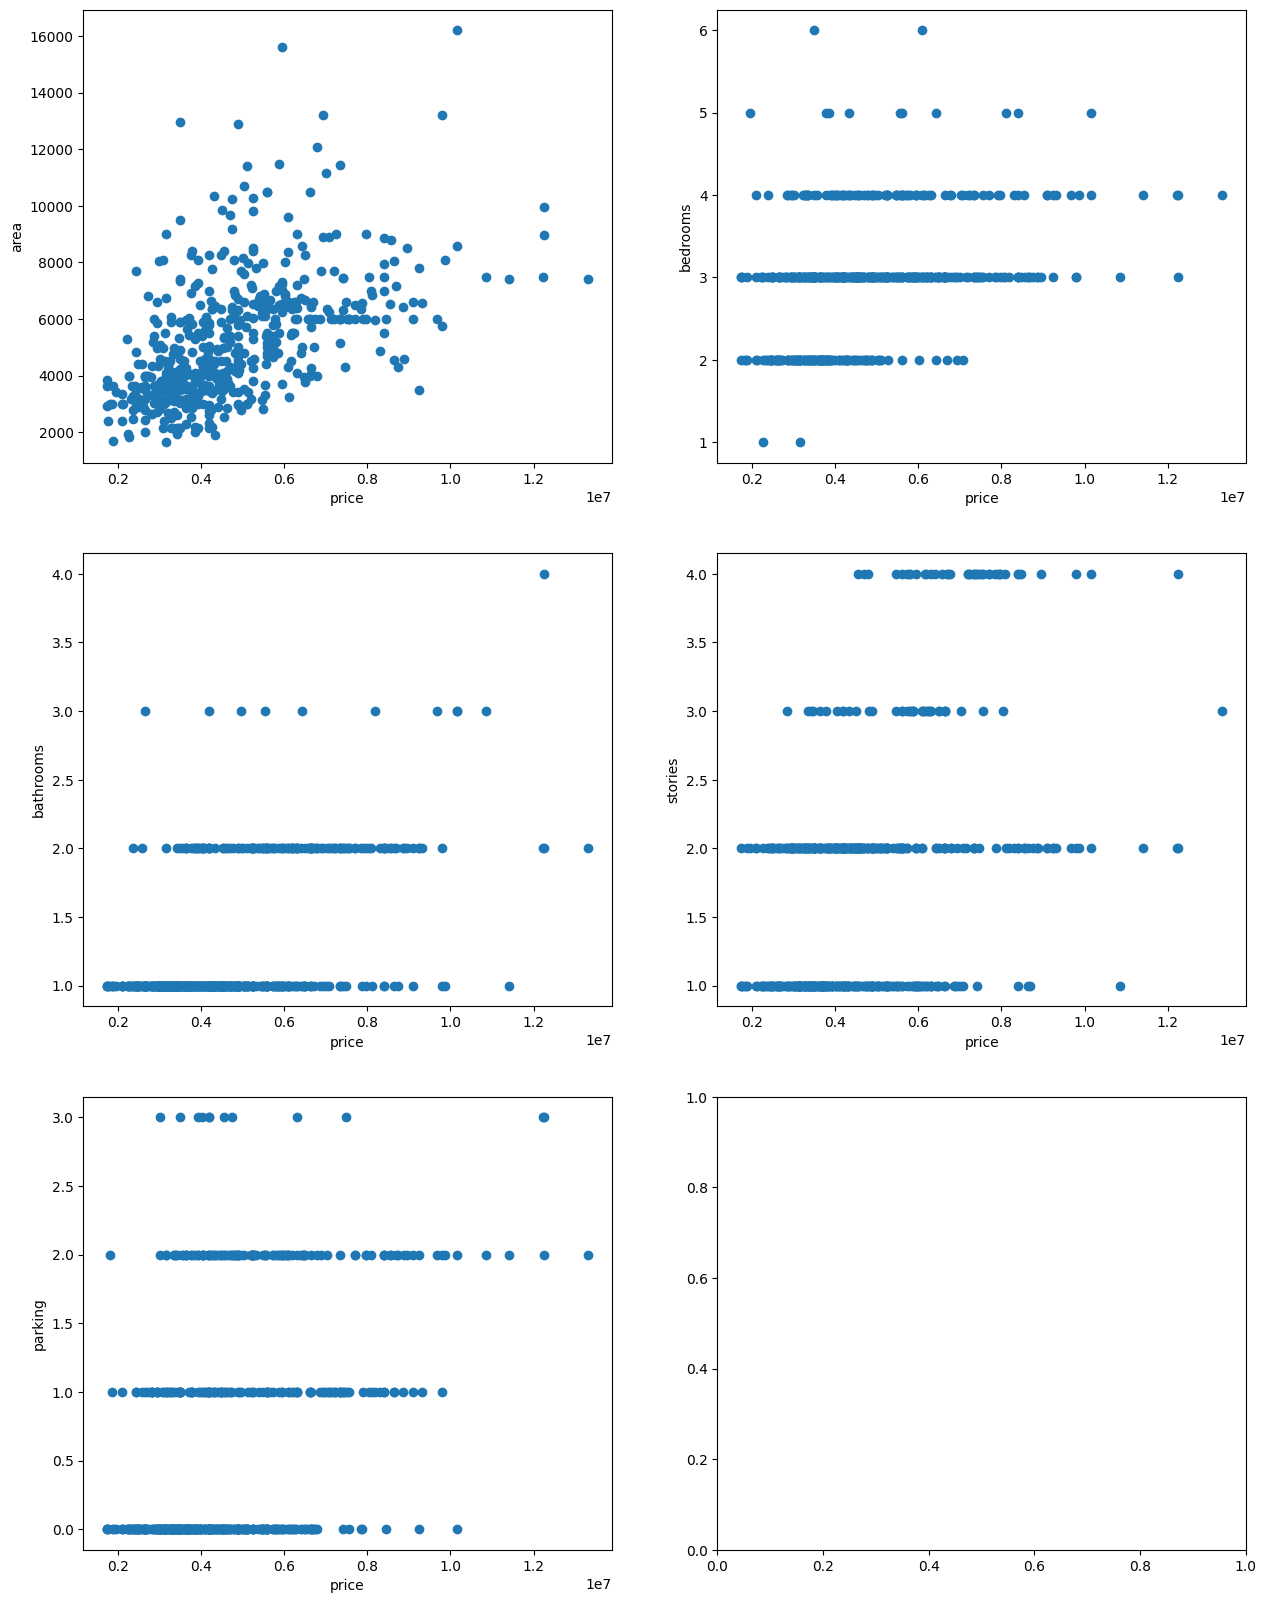

In [5]:
fig, ax = plt.subplots(3, 2, figsize=(15, 20))

ax[0, 0].scatter(df.price, df.area)
ax[0, 0].set_xlabel('price')
ax[0, 0].set_ylabel('area')

ax[0, 1].scatter(df.price, df.bedrooms)
ax[0, 1].set_xlabel('price')
ax[0, 1].set_ylabel('bedrooms')

ax[1, 0].scatter(df.price, df.bathrooms)
ax[1, 0].set_xlabel('price')
ax[1, 0].set_ylabel('bathrooms')

ax[1, 1].scatter(df.price, df.stories)
ax[1, 1].set_xlabel('price')
ax[1, 1].set_ylabel('stories')

ax[2, 0].scatter(df.price, df.parking)
ax[2, 0].set_xlabel('price')
ax[2, 0].set_ylabel('parking')

#Removing outliers from the dataset

In [6]:
df_no_outliers= df.copy()
num_cols=df_no_outliers.select_dtypes(include=("int64",'float64')).columns.tolist()

for col in num_cols:
    Q1=df_no_outliers[col].quantile(0.15)
    Q3=df_no_outliers[col].quantile(0.85)
    IQR= Q3-Q1
    lower_bound= Q1-(1.5*IQR)
    upper_bound= Q3+(1.5*IQR)
    df_no_outliers=df_no_outliers[(df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)]

df_no_outliers

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
11,9681000,6000,4,3,2,yes,yes,yes,yes,no,2,no,semi-furnished
12,9310000,6550,4,2,2,yes,no,no,no,yes,1,yes,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


#Seperating features and labels

In [7]:
X=df_no_outliers.drop(columns=['price'])
y=df_no_outliers.price


#Cheking for skewness

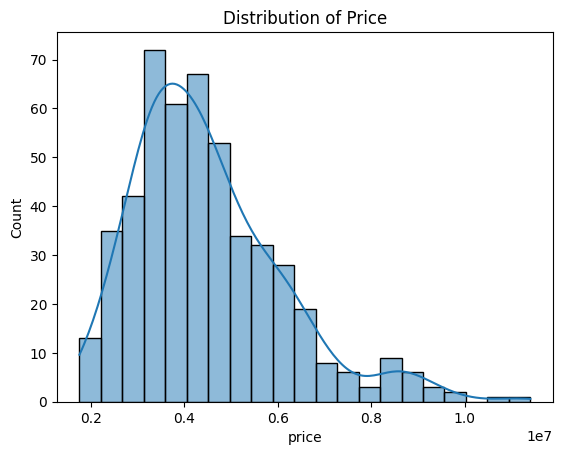

Skewness of price: 1.2122388370279802


In [8]:

sns.histplot(df_no_outliers.price, kde=True)
plt.title("Distribution of Price")
plt.show()
print("Skewness of price:", df.price.skew())


#Splitting the dataset and applying log to reduce skewness

In [9]:

def test_train(X,y,test_size):
    X_train=X.sample(frac=1-test_size,random_state=42)
    idx=X_train.index
    y_train=y[idx]
    X_test=X.drop(labels=idx)
    y_test=y.drop(labels=idx)
    return X_train,X_test,y_train,y_test

test_size=0.3
X_train,X_test,y_train,y_test= test_train(X,y,test_size)
y_train_transformed = np.log1p(y_train)



#Applying transformations like StandardScaler and Encoding manually

In [10]:



def transformation(dataframe):

    #seperating numerical and categorical columns
    numerical_cols=dataframe.select_dtypes(include=('int64','float64','int32')).columns.tolist()
    categorical_cols=dataframe.select_dtypes(include=('object','category')).columns.tolist()

    #standardscaler for numerical cols
    std_values = pd.DataFrame(index=dataframe.index)  # keep same index

    for col in numerical_cols:
        mean = dataframe[col].mean()
        std = dataframe[col].std()

        if np.isnan(std) or std == 0:
        # can't scale → fill with zeros
           std_values[col] = 0
        else:
        # standard scaling
          std_values[col] = (dataframe[col] - mean) / std

    df1=std_values

    #encoding for categorical cols
    df2=pd.get_dummies(dataframe[categorical_cols]).astype(int)

    #merging both the df to get one df
    merged_df = pd.concat([df1, df2],axis=1)

    return merged_df

transformed=transformation(X_train)
transformed

,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
506,-1.012898,-1.202238,-0.481125,-1.021784,-0.788588,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1
111,1.726121,0.101757,-0.481125,2.206867,1.543475,0,1,1,0,1,0,1,0,0,1,1,0,0,0,1
359,-0.666885,0.101757,-0.481125,-1.021784,0.377444,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1
222,2.124287,-1.202238,-0.481125,-1.021784,1.543475,0,1,1,0,0,1,1,0,0,1,1,0,0,1,0
382,-0.892545,0.101757,-0.481125,0.592542,-0.788588,0,1,1,0,0,1,1,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,0.757285,-1.202238,-0.481125,-1.021784,2.709506,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0
74,-0.446239,0.101757,-0.481125,0.592542,0.377444,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0
433,-0.727061,1.405752,-0.481125,0.592542,0.377444,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0
255,0.478970,-1.202238,-0.481125,-1.021784,0.377444,0,1,1,0,1,0,1,0,0,1,1,0,0,0,1


#Calculation wieghts and bias

In [11]:
#calculation of weight and bias
#we gonna use formula beta=(X^t X)^-1 X^t Y
def cal_beta(dataframe1):
      rows=transformed.shape[0]
      mat=np.ones((rows,1))
      mat1=transformed.values
      A = np.hstack((mat, mat1))
      B=y_train_transformed.values
      beta = np.linalg.pinv(A.T @ A) @ A.T @ B
      return beta
beta= cal_beta(transformed)
beta


array([3.55182216, 0.0985268 , 0.03908081, 0.06989239, 0.03486286,
       0.0254371 , 1.71174839, 1.84007377, 1.73100209, 1.82082007,
       1.73758146, 1.8142407 , 1.69956524, 1.85225692, 1.69036982,
       1.86145234, 1.722839  , 1.82898316, 1.21678588, 1.23756826,
       1.09746802])

#Making Prediction using Beta

In [12]:

def prediction(dataframe2,beta1):
    cols=dataframe2.columns
    pred=beta1[0]
    i=0
    for col in cols:
       pred+=dataframe2[col]*beta1[i+1]
       i=i+1
    return pred

s_1=transformation(X_test)
s_1
y_transformed_pred=prediction(s_1,beta)
y_pred = np.expm1(y_transformed_pred)
print("Actual output: ",y_test)
print("Predicted output: ",y_pred)


Actual output:  5      10850000
12      9310000
16      9100000
22      8645000
23      8645000
         ...   
533     2100000
534     2100000
537     1890000
541     1767150
544     1750000
Name: price, Length: 149, dtype: int64
Predicted output:  5      8.504307e+06
12     7.060842e+06
16     7.268766e+06
22     6.184044e+06
23     6.242439e+06
           ...     
533    2.970251e+06
534    3.247393e+06
537    2.862264e+06
541    2.844541e+06
544    3.207074e+06
Name: area, Length: 149, dtype: float64


#Model evaluation and visualization

In [13]:
n=float(len(y_test))
mse=(1/n)*sum((y_test-y_pred)**2)
mean=np.mean(y_test)
nr=sum((y_test-y_pred)**2)
dr=sum((y_test-mean)**2)
r_2=1-(nr/dr)
print("MSE=",mse)
print("R^2 score=",r_2)


MSE= 773067050615.1692
R^2 score= 0.7041483595669271


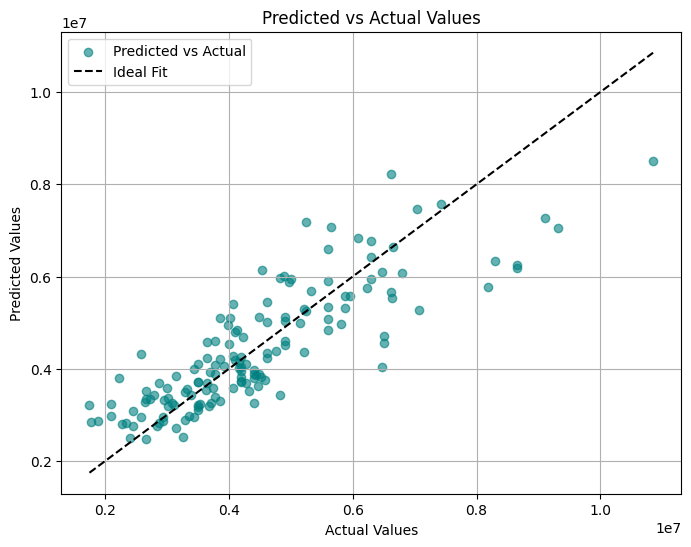

In [14]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal',label='Predicted vs Actual')
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color='black',
    linestyle='--',
    label='Ideal Fit'
)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.legend()
plt.grid(True)
plt.show()



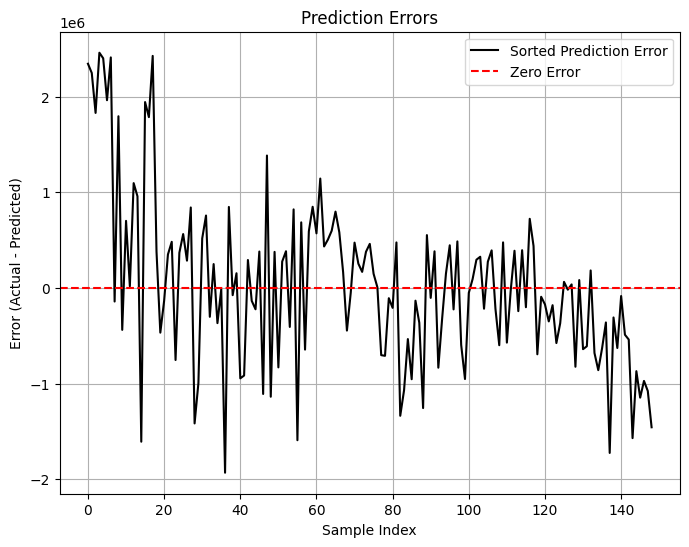

In [15]:

error = (y_test - y_pred)


plt.figure(figsize=(8, 6))
plt.plot(error.values, label='Sorted Prediction Error', color='black')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Error')

plt.xlabel("Sample Index")
plt.ylabel("Error (Actual - Predicted)")
plt.title("Prediction Errors")
plt.legend()
plt.grid(True)
plt.show()


#Random Testing

In [18]:
def testing():
    area = float(input("Enter the area of the house: "))
    bedrooms = float(input("Enter the number of bedrooms: "))
    bathrooms = float(input("Enter the number of bathrooms: "))
    stories = float(input("Enter number of stories: "))
    parking = int(input("Number of parking spaces: "))
    near_mainroad = input("Is the house near to main road? (yes/no): ")
    guest_room = input("Are there any guest room? (yes/no): ")
    basement = input("Does it have Basement? (yes/no): ")
    hotwater = input("Water heating availabel? (yes/no): ")
    ac = input("AC available? (yes/no): ")
    prefarea = input("Do the house is in preferred area? (yes/no): ")
    furn_status = input("Furnishing status(furnished/unfurnished/semi-furnished): ")

    data_dict = {
        'area': area,
        'bedrooms': bedrooms,
        'bathrooms': bathrooms,
        'stories': stories,
        'parking': parking,
        'mainroad': near_mainroad,
        'guestroom': guest_room,
        'basement': basement,
        'hotwaterheating': hotwater,
        'airconditioning': ac,
        'prefarea': prefarea,
        'furnishingstatus': furn_status
    }
    data = pd.DataFrame([data_dict])
    tran_data=transformation(data)
    pred=prediction(tran_data,beta)
    print("------------------------------------------------------------")
    print("Expected house price: ",pred[0])
testing()


Enter the area of the house: 1200
Enter the number of bedrooms: 2
Enter the number of bathrooms: 2
Enter number of stories: 2
Number of parking spaces: 2
Is the house near to main road? (yes/no): yes
Are there any guest room? (yes/no): no
Does it have Basement? (yes/no): no
Water heating availabel? (yes/no): no
AC available? (yes/no): yes
Do the house is in preferred area? (yes/no): yes
Furnishing status(furnished/unfurnished/semi-furnished): unfurnished
------------------------------------------------------------
Expected house price:  15.90685387754322
